In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('manuf_mnc.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 34 columns):
Assets                                                                                                         356 non-null float64
adsh                                                                                                           356 non-null object
cik                                                                                                            356 non-null int64
coreg                                                                                                          0 non-null float64
ddate                                                                                                          356 non-null int64
ein                                                                                                            325 non-null float64
fy                                                                                                            

In [5]:
# Unique Number of Manufacturing Firms for analysis
df.cik.nunique()

89

## Dividing (Identifying) which companies are foreign and domestic

In [6]:
df['check1']=np.where(df.IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign.isnull(),0,1)
df['check2']=np.where(df.UndistributedEarningsOfForeignSubsidiaries.isnull(),0,1)
df['check3']=np.where(df.ForeignEarningsRepatriated.isnull(),0,1)

df['check']=df['check1']+df['check2']+df['check3']

In [7]:
del df['check1']
del df['check2']
del df['check3']

In [8]:
# Giving identifiers to companies as to whether each of them has foreign subsidiary(foreign operation) or not
df['Type of Firm'] = np.where(df.check==0,'Domestic','Foreign')

In [9]:
del df['check']

## Creating new variables [field]/Assets

In [12]:
# Creating new variable (total income / Assets)
df['Total_Income_scaled']=\
df['GrossProfit']/df['Assets']

In [13]:
# Creating new variable (Liabilties / Assets)
df['Liabilities_scaled']=\
df['Liabilities']/df['Assets']

In [14]:
# Creating new variable (R&D / Assets)
df['ResearchAndDevelopmentExpense_scaled']=\
df['ResearchAndDevelopmentExpense']/df['Assets']

In [35]:
# Creating new variable (Foreign Income / Assets)
df['Foreign_Income_scaled']=\
df['IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign']/df['Assets']

In [16]:
df['UFE_scaled']=\
df['UndistributedEarningsOfForeignSubsidiaries']/df['Assets']

**Undistributed Foreign Earnings**

Text(0.5,1,'Mean Undistributed Foreign Earnings normalized (Manufacturing)')

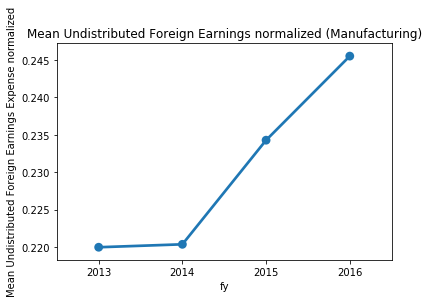

In [24]:
# Mean Normalized Undistributed Foreign Earnings of MNCs in Manufacturing Industry

sns.pointplot(x='fy',y='UFE_scaled',
              data= df.groupby(['fy'])['UFE_scaled'].mean().reset_index())

plt.ylabel('Mean Undistributed Foreign Earnings Expense normalized')
plt.title('Mean Undistributed Foreign Earnings normalized (Manufacturing)')

#### Foreign Income

Text(0,0.5,'Foreign Income of MCNs')

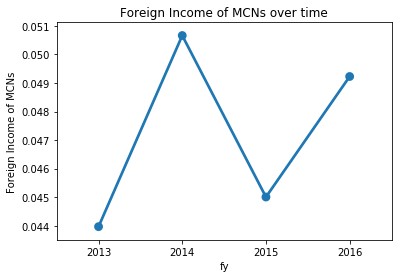

In [36]:
sns.pointplot(x='fy',
              y='Foreign_Income_scaled',
             data=df.groupby('fy').Foreign_Income_scaled.mean().reset_index())

plt.title('Foreign Income of MCNs over time')
plt.ylabel('Foreign Income of MCNs')

**Total Income**

In [26]:
# Mean of (Total Income/ Assets) of firms in Manufacturing per year
total_income_mean_scaled =\
pd.DataFrame(df[df['Total_Income_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
             groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

Text(0,0.5,'Mean of Total Income normalized')

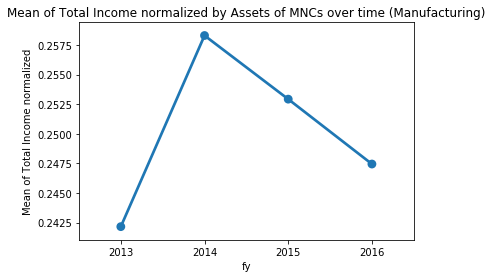

In [27]:
# Total Income normalized by Assets of MNCs over time
sns.pointplot(x=total_income_mean_scaled[total_income_mean_scaled['Type of Firm']=='Foreign'].fy,
         y=total_income_mean_scaled[total_income_mean_scaled['Type of Firm']=='Foreign'].Total_Income_scaled)

plt.title('Mean of Total Income normalized by Assets of MNCs over time (Manufacturing)')
plt.ylabel('Mean of Total Income normalized')

**R&D**

In [28]:
# Mean of (R & D / Assets) of firms in industry 2 per year
r_and_d_mean_scaled =\
pd.DataFrame(df[df['ResearchAndDevelopmentExpense_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','ResearchAndDevelopmentExpense_scaled']].\
             groupby(['fy','Type of Firm'])['ResearchAndDevelopmentExpense_scaled'].mean()).reset_index()

Text(0,0.5,'Mean of R&D Expense normalized')

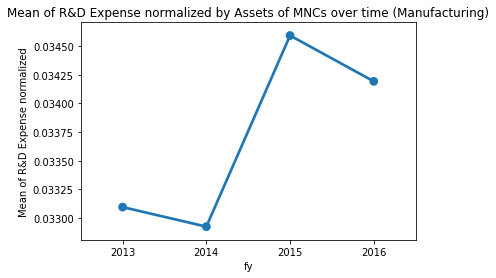

In [29]:
# R & D normalized by Assets of MNCs over time
sns.pointplot(x=r_and_d_mean_scaled[r_and_d_mean_scaled['Type of Firm']=='Foreign'].fy,
         y=r_and_d_mean_scaled[r_and_d_mean_scaled['Type of Firm']=='Foreign'].ResearchAndDevelopmentExpense_scaled)

plt.title('Mean of R&D Expense normalized by Assets of MNCs over time (Manufacturing)')
plt.ylabel('Mean of R&D Expense normalized')

**Liabilities**

In [30]:
# Mean of (Liabilities/ Assets) of firms in Manufacturing per year
liabilities_mean_scaled =\
pd.DataFrame(df[df['Liabilities_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Liabilities_scaled']].\
             groupby(['fy','Type of Firm'])['Liabilities_scaled'].mean()).reset_index()

Text(0,0.5,'Mean of Liabilities normalized')

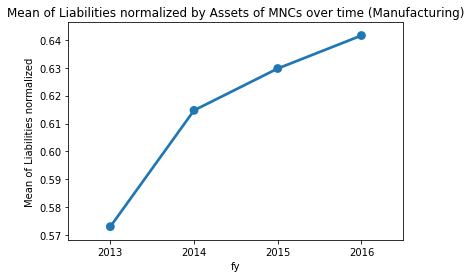

In [31]:
# Liabilities normalized by Assets of MNCs over time
sns.pointplot(x=liabilities_mean_scaled[liabilities_mean_scaled['Type of Firm']=='Foreign'].fy,
y=liabilities_mean_scaled[liabilities_mean_scaled['Type of Firm']=='Foreign'].Liabilities_scaled)

plt.title('Mean of Liabilities normalized by Assets of MNCs over time (Manufacturing)')
plt.ylabel('Mean of Liabilities normalized')